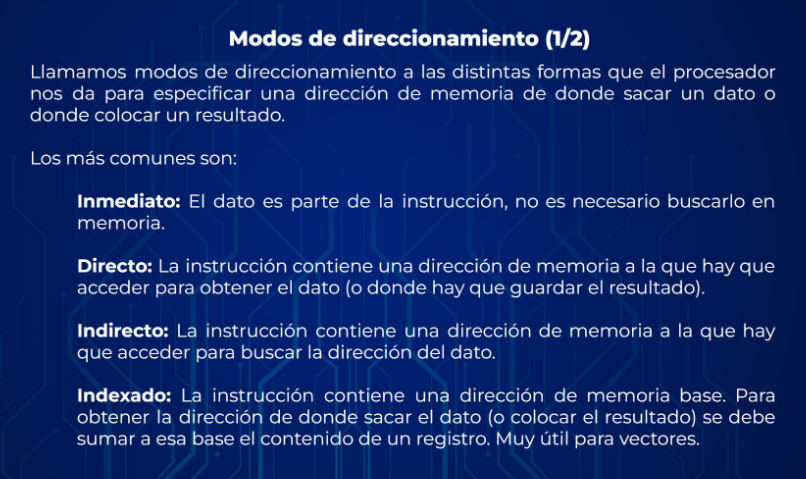

<div style="font-family: 'Source Code Pro'; font-size: 24px;">

## **Modos de direccionamiento:**

Llamamos modos de direccionamiento a las distintas formas que el procesador nos da para especificar  una direccion de memoria de donde sacar un dato o donde colocar un resultado.

Los mas comunes son:

- Inmediato: 
    - El dato es parte de la isntruccion, no es necesario buscarlo en memoria
    - Ejemplo: Si la instruccion es 'MOV A, #5', el valor '5' es el dato inmediato que se carga directamente en el registro 'A'.


- Directo: 
    - La instruccion contiene una direccion de memoria a la que hay que acceder para obtener el dato (o donde hay que guardar el resultado)
    - Ejemplo: Si la instruccion es 'MOV A, [1000]', se accede a la direccion de memoria '1000' para cargar el valor en el registro 'A'.

- Indirecto:
    - La instruccion contiene una direccion de memoria a la que hay que acceder para buscar la direccion del dato
    - Ejemplo: Si la instruccion es 'MOV A, @R1', y 'R1' contiene '1000', entonces el dato se toma de la direccion '1000', que es lo que apunta 'R1'

- Indexado: 
    - La instruccion contiene una direccion de memoria base. Para obtener la direccion de donde sacar el dato (o colocar el resultado) se debe sumar a esa base el contenido de un registro. Muy util para vectores.
    - Ejemplo: Si la instruccion es 'MOV A, [BASE+R1], y 'BASE' es '1000' y 'R1' es '5', el dato se extrae de la direccion '1005'.

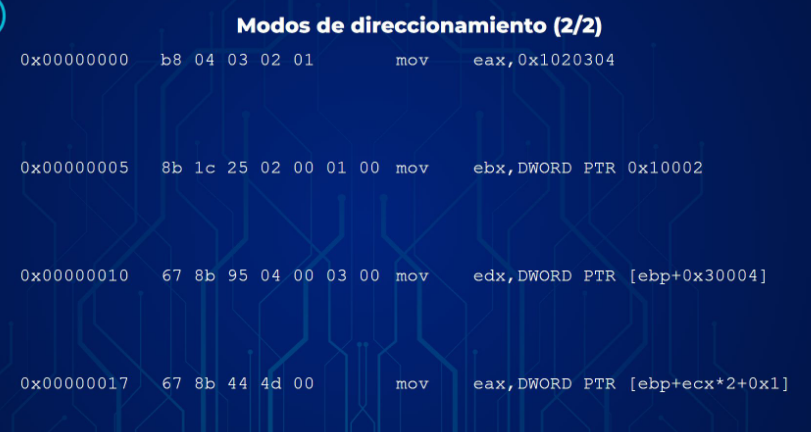

<div style="font-family: 'Source Code Pro'; font-size: 24px;">

La imagen muestra ejemplos de instrucciones de ensamblador que utilizan diferentes modos de direccionamiento.

1- Instruccion 1:

- Codigo: 'mov eax, 0x1020304
- Direccionamiento: Inmediato
- Descripcion: El valor 0x1020304 es el operando inmediato y se carga directamente en el registro eax.

2- Instruccion 2:

- Codigo: 'mov ebx, DWORD PTR 0x10002
- Direccionamiento: Directo
- Descripcion: La direccion 0x10002 es la direccion de memoria que se accece directamente para cargar un valor de 32 bits ('DWORD') en el registro ebx.

3- Instruccion 3:

- Codigo: 'mov edx, DWORD PTR [ebp + 0x30004]'
- Dirrecionamiento: Indexado.
- Descripcion: La direccion efectiva se obtiene sumando el valor del registro 'ebp' con el desplazamiento 0x30004. El valor en la direccion calculada se mueve al registro 'edx'.

4- Instruccion 4:

- Codigo: 'mov eax, DWORD PTR [ebp + ecx*2 + 0x1]
- Dirrecionamiento: Indexado con escala
- Descripcion: En este caso, la direccion se calcula sumando el valor en 'ebp', el doble del valor en 'ecx' (ecx*2), y un desplazamiento adicional de 0x1. El valor encontrado en la direccion resultante se carga en el registro eax.

<div style="font-family: 'Source Code Pro'; font-size: 24px;">

# **Stack**

## **Stack Pointer (ESP):**

- Descripcion: El stack pointer es un registro que apunta a la direccion de la cima de la pila (stack) en la memoria. La pila es una estructura de datos que sigue el principio LIFO (Last In First Out), es decir, el ultimo dato que se inserta es el primero en salir.

- Funcion: El registro 'ESP' contiene la direccion de la proxima ubicacion libre en la pila, donde se puede realizar una operacion PUSH (empujar un valor en la pila) o la direccion de la ultima posicion ocupada en caso de una operacion POP (sacar un valor de la pila).

## **Instruction Pointer (EIP):**

- Descripcion: El instrucion Pointer, tambien conocdio como Program Counter en otras arquitecturas, es un regustro que contiene la direccion de la proxima instruccion que se ejecutara en el programa.

- Funcion: Se incrementa automaticamente para apuntar a la siguiente instruccion a medida que las instrucciones se ejecutan en secuencia. Si se ejecuta una instruccio de salto o llamada, EIP se actualiza para apuntar a la nueva direccion de memoria.

Operaciones de pila (Stack Operations):

**1- PUSH:**

- Descripcion: La instruccion PUSH se utiliza para colocar (empujar) un valor en la pila.

- Funcionamiento:

    1- El ESP se decrementa para apuntar a una posicion mas baja en la pila (porque en muchas arquitecturas la pila crece hacia abajo en la memoria).
    2- El valor que se quiere empujar en la pila se coloca en la direccion de memoria ahora apuntada por ESP.
    Ejemplo:
    PUSH EAX
    Esto empuja el valor actual de EAX en al pila y decrementa ESP.

**2- POP:**

- Descripcion: La instruccion POP se utiliza para sacar (extraer) el valor mas reciente de la pila.

- Funcionamiento:

    1- El valor en la direccion apuntada por ESP se saca de la pila y se coloca en el registro destino.
    2- El ESP se incrementa para apuntar la siguiente posicion superior en la pila, "liberando" la ubicacion que contenia el valor extraido.
    - Ejemplo:
    POP EBX
    Esto extrae el valor en la parte superior de la pila y lo coloca en EBX, luego incrementa ESP.

Resumen:

- ESP es crucial para manejar la pila, asegurando que las operaciones PUSH y POP funcionen correctamente.

- EIP es importante para la ejecución secuencial de instrucciones y el control de flujo en un programa.

- Las instrucciones PUSH y POP permiten el almacenamiento temporal y la recuperación de datos en la pila, lo cual es fundamental para la gestión de llamadas a funciones, variables locales, y la manipulación de datos temporales en la programación en ensamblador.

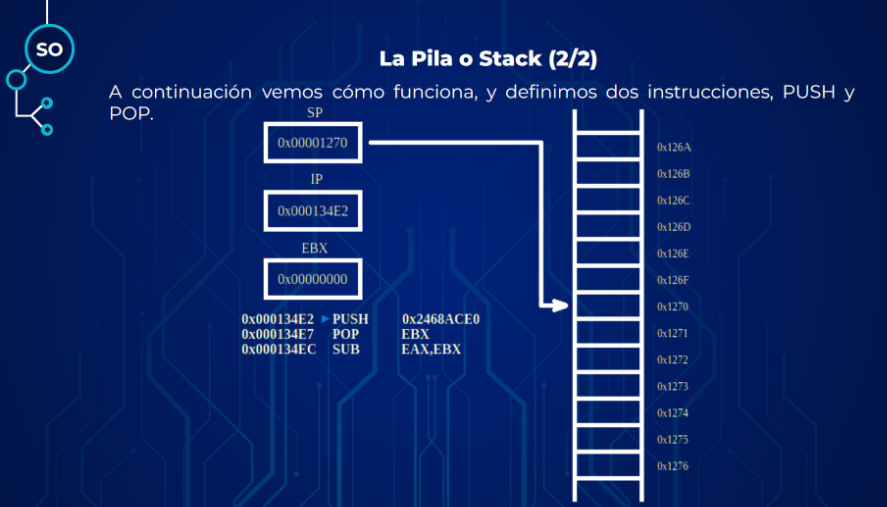

<div style="font-family: 'Source Code Pro'; font-size: 24px;">

La imagen muestra como funcionan las instrucciones PUSH y POP en la pila (stack).

1- SP (Stack Pointer):

- En la imagen, SP tiene el valor 0x00001270. Esto signficia que el punteor de la pila esta apuntando a la direccion 0x1270, que es la primera direccion libre en la pila donde se puede realizar un PUSH.

2- IP (Instruction Pointer):

- IP tiene el valor 0x000134E2, que es la direccion de la proxima instruccion a ejecutar, que en este caso es PUSH

3- EBX:

- EBX tiene un valor de 0x00000000. Este registro es un registro general que se utilzia para operaciones de proposito general.

4- Instrucciones:

- Las instrucciones que se van a ejecutar son:

    - PUSH: Empuja el valor en EBX en la pila.
    - POP: Extrae el valor en la parte superior de la pila y lo almacena en EBX
    - SUB: Resta un valor (en este caso no especificado en la imagen) y almacena el resultado.

5- Direcciones de memoria en la pila:

- La pila se muestra como una serie de direcciones de memoira, empezando desde 0x1270 hacia arriba.

- A medida que se realizan operaciones PUSH y POP, el puntero de la pila (SP) se actualizara para reflejar el cambio en la cima de la pila.

Ejemplo de Ejecución de PUSH y POP

1- PUSH EBX:

- La instrucción PUSH EBX tomará el valor contenido en EBX (que es 0x00000000) y lo empujará en la pila.

- El SP se decrementará (por ejemplo, de 0x1270 a 0x126F) para apuntar a la nueva cima de la pila, donde se almacena el valor 0x00000000.

2- POP EBX:

- La instrucción POP EBX extraerá el valor en la cima de la pila (en este caso 0x00000000) y lo cargará en EBX.
- Después de esto, SP se incrementará (por ejemplo, de 0x126F a 0x1270) para apuntar nuevamente a la siguiente dirección libre en la pila.

Conclusión

La imagen ilustra cómo el registro SP se usa para manejar la pila y cómo las instrucciones PUSH y POP interactúan con la pila, modificando tanto los valores almacenados en la memoria como el puntero de la pila (SP). Esto es crucial para la gestión de variables temporales, llamadas a funciones y retornos en la programación en ensamblador y la arquitectura de procesadores.

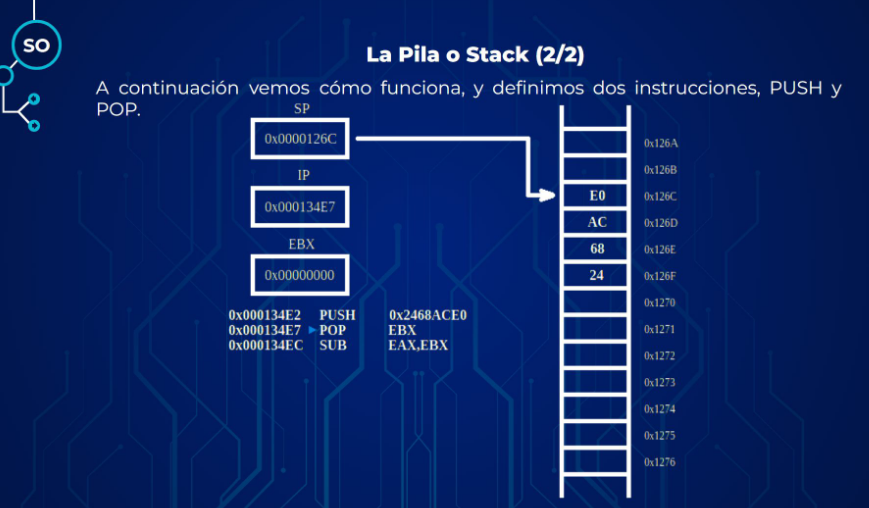

<div style="font-family: 'Source Code Pro'; font-size: 24px;">

La nueva imagen muestra la continuación del proceso que vimos anteriormente, donde se ejecuta la instrucción POP y cómo afecta a la pila y a los registros.


1- Stack Pointer (SP):

- Ahora, SP tiene el valor 0x0000126C, lo que indica que apunta a la dirección 0x126C en la memoria, donde se encuentra el valor que se va a extraer (pop).

2- Instruction Pointer (IP):

- El IP ha avanzado a 0x000134E7, indicando que está a punto de ejecutar la instrucción POP.

EBX:

- EBX aún muestra 0x00000000, pero este valor cambiará después de ejecutar la instrucción POP.

Contenido de la Pila:

- La pila muestra los valores que están actualmente almacenados, con 0x24, 0x68, 0xAC, y 0xE0 almacenados en las direcciones 0x1270, 0x126F, 0x126E, y 0x126D, respectivamente.

- El valor en la parte superior de la pila (apuntado por SP en 0x126C) es 0xE0.

Ejecución de POP EBX

- Instrucción: POP EBX

    - El valor en la dirección de memoria 0x126C (0xE0) se extrae de la pila y se coloca en el registro EBX.

    - Después de ejecutar esta instrucción, el SP se incrementa, moviéndose a 0x126D, apuntando a la nueva parte superior de la pila.

Resultado Esperado

- Registro EBX: Ahora debería contener el valor 0xE0.

- Stack Pointer (SP): Después de ejecutar POP, SP debe incrementarse, pasando a 0x126D.

Conclusión

Esta imagen demuestra cómo la instrucción POP retira un valor de la pila, almacena ese valor en un registro (EBX en este caso), y luego ajusta el puntero de la pila (SP) para reflejar la nueva parte superior de la pila. Esta operación es crucial para restaurar valores previamente guardados en la pila, como ocurre a menudo al retornar de funciones o manejar variables locales.

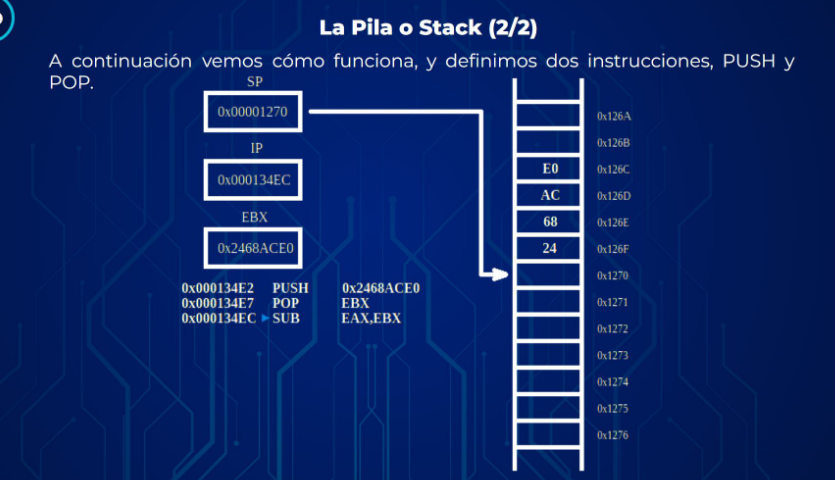

<div style="font-family: 'Source Code Pro'; font-size: 24px;">

En esta última imagen se observa el estado final del proceso después de que se ejecutó la instrucción POP y se procedió a la siguiente instrucción SUB.


1- Stack Pointer (SP):

- El valor del SP ha vuelto a 0x00001270, indicando que ahora apunta a la cima de la pila después de la operación POP.

2- Instruction Pointer (IP):

- El IP ha avanzado a 0x000134EC, lo que indica que la próxima instrucción que se ejecutará es SUB.

3- EBX:

- El registro EBX ahora contiene el valor 0x2468ACE0, que es el valor extraído de la pila en la instrucción POP.

4- Contenido de la Pila:

- La pila sigue conteniendo los valores 0x24, 0x68, 

- 0xAC, y 0xE0 en las direcciones 0x126F, 0x126E, 

- 0x126D, y 0x126C, respectivamente. Sin embargo, la cima de la pila ahora está nuevamente en 0x1270, lo que significa que está lista para la próxima operación de PUSH si fuera necesario.

Conclusión:

Esta serie de imágenes ilustra cómo las operaciones de PUSH y POP afectan tanto el contenido de la pila como los registros del procesador (EBX en este caso). Después de ejecutar POP, el valor almacenado en la parte superior de la pila se extrae y se coloca en el registro EBX, y el puntero de la pila (SP) se ajusta en consecuencia para reflejar la nueva cima de la pila.

Esto es una demostración de cómo el procesador maneja la memoria temporalmente y cómo se gestionan las llamadas a funciones, el paso de parámetros, y el almacenamiento de variables locales usando la pila.

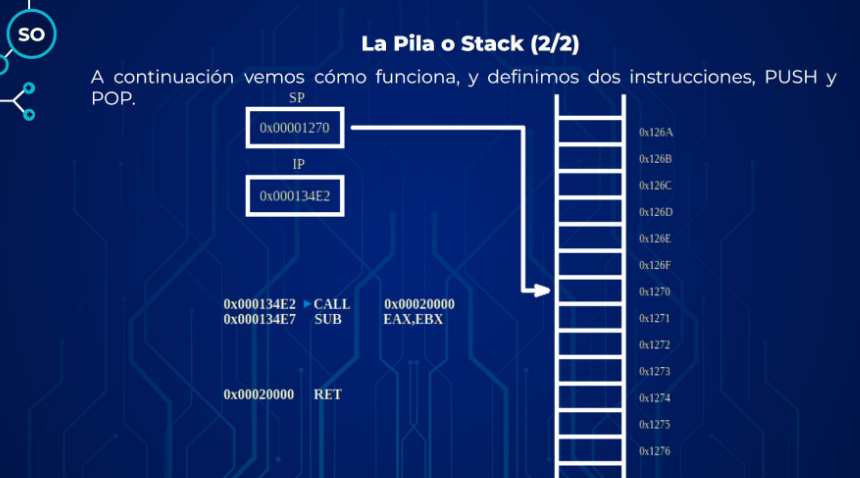

<div style="font-family: 'Source Code Pro'; font-size: 24px;">

En esta imagen se ilustra el proceso de una llamada a función mediante la instrucción CALL y el uso de la pila para gestionar la dirección de retorno.


1- Stack Pointer (SP):

- El SP tiene el valor 0x00001270, indicando que la pila está lista para almacenar la dirección de retorno de la función que se va a llamar.

2- Instruction Pointer (IP):

- El IP apunta a 0x000134E2, que es la dirección de la instrucción CALL.

3- Instrucciones:

- CALL: La instrucción CALL se utiliza para invocar una función. Durante su ejecución, se realiza lo siguiente:

    - La dirección de la siguiente instrucción (0x000134E7) se almacena en la pila para que se pueda regresar a ella después de que la función haya terminado.

    - El IP se actualiza para apuntar a la dirección de inicio de la función llamada.

- SUB: Una vez que se retorne de la función, se ejecutará la instrucción SUB, que realizará una operación de resta con los valores almacenados en los registros involucrados (EAX y EBX en este caso).

- RET: La instrucción RET se usa al final de la función llamada para retornar al punto desde donde se hizo la llamada. Se extrae la dirección de retorno almacenada en la pila y se carga en IP.

Proceso de CALL y RET:

1- CALL:

- Cuando se ejecuta CALL, la dirección 0x000134E7 (la siguiente instrucción después de CALL) se empuja en la pila, y el SP se decrementa para reflejar esto.

- El IP se actualiza con la dirección de inicio de la función (0x00002000 en este caso).

2- RET:

- Al final de la función, la instrucción RET extrae la dirección de retorno de la pila, que es 0x000134E7, y la carga en IP.

- El SP se incrementa, restaurando la pila a su estado antes de la llamada a la función.

Conclusión:

Esta imagen muestra cómo se utiliza la pila para gestionar las llamadas a funciones en ensamblador. Al llamar a una función, la dirección de la próxima instrucción se almacena en la pila para garantizar que se pueda regresar correctamente después de la ejecución de la función. El uso de CALL y RET es fundamental para la modularización del código y el control del flujo de ejecución en los programas.

<div style="font-family: 'Source Code Pro'; font-size: 24px;">

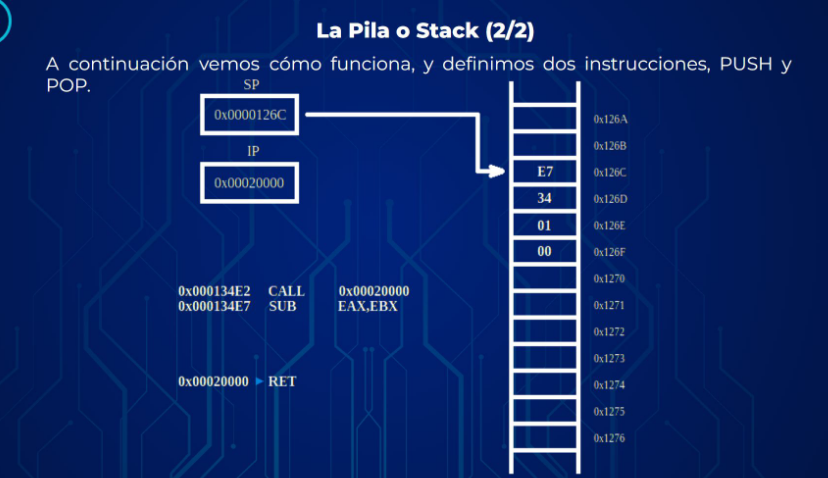


<div style="font-family: 'Source Code Pro'; font-size: 24px;">

Esta imagen muestra el estado de la pila y los registros después de ejecutar la instrucción CALL. Aquí se ve cómo la dirección de retorno se almacena en la pila, y cómo se actualizan los punteros correspondientes.

1- Stack Pointer (SP):

- El SP ahora tiene el valor 0x0000126C, lo que indica que el puntero de la pila ha sido decrementado para acomodar la dirección de retorno.

2- Instruction Pointer (IP):

- El IP se ha actualizado a 0x00002000, lo que indica que la CPU está ahora ejecutando la función a la que se llamó con CALL.

3- Contenido de la Pila:

- La pila contiene ahora la dirección de retorno 0x000134E7, que es la dirección de la instrucción que sigue después de CALL. Esta dirección se ha dividido en sus bytes individuales:
    - E7 (byte más bajo)
    - 34
    - 01
    - 00 (byte más alto)
Estos valores están almacenados en las direcciones de memoria 0x126C, 0x126D, 0x126E, y 0x126F, respectivamente.

Proceso Explicado:

1- CALL:

- Al ejecutar CALL, la dirección de la siguiente instrucción (0x000134E7) se empuja en la pila.

- El SP se decrementa para reflejar el nuevo estado de la pila.

- El IP se actualiza con la dirección de la función (0x00002000), y la ejecución del programa continúa en esa nueva ubicación.

2- Ejecución de la Función:

- La función puede realizar varias operaciones. Al finalizar, se ejecutará la instrucción RET (retorno), que extraerá la dirección de retorno desde la pila y la cargará en IP, permitiendo que el programa continúe ejecutándose desde donde se dejó.

Conclusión:

Esta imagen ilustra claramente cómo la pila es utilizada para almacenar la dirección de retorno durante una llamada a función (CALL). Esto permite que, después de completar la función llamada, el programa pueda retornar al punto correcto en el código y continuar con la ejecución secuencial normal. La manipulación de la pila de esta manera es fundamental para la gestión del flujo de control en la programación de bajo nivel, especialmente en lenguajes ensambladores y sistemas operativos.

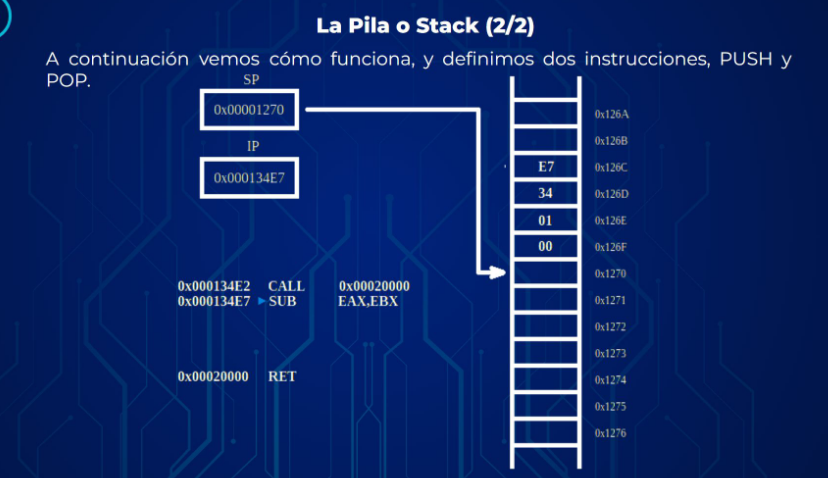

<div style="font-family: 'Source Code Pro'; font-size: 24px;">

En esta imagen se observa el estado final de la pila y los registros después de que se ha completado la ejecución de una llamada a función (CALL) y se ha regresado a la instrucción que sigue después de la llamada (SUB).

1- Stack Pointer (SP):

- El SP ha vuelto a 0x00001270, indicando que la dirección de la pila ha sido restaurada a su estado previo a la llamada a la función. Esto significa que la dirección de retorno ha sido removida de la pila.

2- Instruction Pointer (IP):

- El IP ahora tiene el valor 0x000134E7, lo que indica que el procesador ha retornado al punto justo después de la instrucción CALL, y está listo para ejecutar la siguiente instrucción, SUB.

3- Contenido de la Pila:

- La pila todavía contiene los bytes que correspondían a la dirección de retorno 0x000134E7 (E7, 34, 01, 00), pero el SP ahora apunta a 0x1270, indicando que esos valores ya no forman parte de la pila activa.

4- Ejecución de la Función:

- La función a la que se llamó (CALL) ha finalizado y ha ejecutado la instrucción RET, lo que hizo que la dirección de retorno se extraiga de la pila y se cargue en el IP.

Resumen del Proceso:

1- Llamada a Función (CALL):

- La dirección de retorno se empuja en la pila.

- El SP se decrementa para reflejar el nuevo estado de la pila.

- El IP se actualiza para apuntar a la función llamada.

2- Retorno de Función (RET):

- La función se ejecuta y, al finalizar, la instrucción 
1RET extrae la dirección de retorno de la pila.

- La pila se restaura a su estado anterior (SP vuelve a 0x1270).

- El IP se actualiza con la dirección de retorno, permitiendo que la ejecución del programa continúe justo después de la llamada a la función.

Conclusión:

Esta imagen muestra el ciclo completo de una llamada a función en ensamblador, destacando cómo la pila se utiliza para manejar la dirección de retorno y cómo el procesador retoma la ejecución del programa justo donde lo dejó antes de la llamada a la función. La pila juega un papel crucial en la gestión del flujo de control, permitiendo que el código sea modular y fácil de seguir, incluso en niveles muy bajos como el ensamblador.

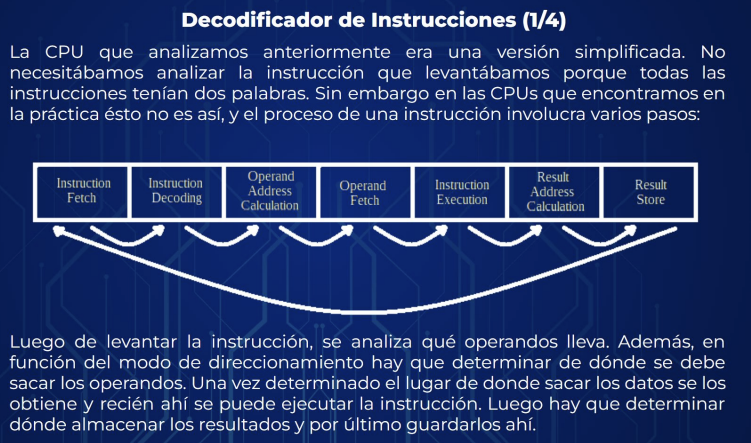

<div style="font-family: 'Source Code Pro'; font-size: 24px;">

La imagen que compartiste ilustra el proceso de decodificación y ejecución de instrucciones en una CPU, desglosando los pasos involucrados en la ejecución de una instrucción compleja. A continuación, te explico cada uno de los pasos descritos en la imagen:

Pasos del Proceso de Ejecución de una Instrucción:

1- Instruction Fetch (Captura de la Instrucción):

- En este primer paso, la CPU obtiene la instrucción desde la memoria, utilizando el Instruction Pointer (IP) que indica la dirección de la próxima instrucción a ejecutar. Esta instrucción se carga en el registro de instrucción.

2- Instruction Decoding (Decodificación de la Instrucción):

- Una vez que la instrucción ha sido capturada, la CPU decodifica la instrucción para entender qué operación se debe realizar. Esto incluye identificar los operandos, el tipo de operación, y el modo de direccionamiento.

3- Operand Address Calculation (Cálculo de la Dirección del Operando):

- Dependiendo del modo de direccionamiento, la CPU calcula la dirección de los operandos, si es necesario. Por ejemplo, si la instrucción utiliza direccionamiento indirecto o indexado, en este paso se determina la dirección efectiva de los datos a operar.

4- Operand Fetch (Captura del Operando):

- Con las direcciones calculadas, la CPU accede a la memoria o a los registros para obtener los operandos necesarios para la operación.

5- Instruction Execution (Ejecución de la Instrucción):

- En este paso, la CPU ejecuta la operación indicada 
por la instrucción. Esto podría ser una operación aritmética, lógica, de control de flujo, etc.

6- Result Address Calculation (Cálculo de la Dirección del Resultado):

- Después de la ejecución, la CPU determina dónde se deben almacenar los resultados de la operación, si es necesario escribir en memoria.

7- Result Store (Almacenamiento del Resultado):

- Finalmente, los resultados de la operación se almacenan en la ubicación adecuada, que podría ser un registro o una dirección de memoria.

Conclusión:

Este flujo de trabajo muestra que la ejecución de una instrucción en una CPU es un proceso complejo que involucra múltiples etapas, desde la captura y decodificación de la instrucción hasta el almacenamiento del resultado final. Cada paso es crucial para garantizar que las operaciones se realicen correctamente y en el orden adecuado. Este esquema también pone en relieve la importancia de los modos de direccionamiento, ya que influyen en cómo se calculan y se acceden a los operandos durante la ejecución de una instrucción.

Decodificador de Instrucciones y Unidad de Control:

1- Unidad de Control (UC):

- La Unidad de Control es el componente de la CPU que gestiona y coordina la ejecución de las instrucciones. Genera todas las señales de control internas necesarias para que las instrucciones se ejecuten correctamente.

2- Decodificador de Instrucciones:

- El Decodificador de Instrucciones es un sub-bloque dentro de la Unidad de Control que se encarga de generar señales de control específicas en función de la instrucción que se está ejecutando en un momento dado. Este decodificador interpreta la instrucción y decide qué operaciones y en qué orden deben ser realizadas por los otros componentes de la CPU.

3- Implementación del Decodificador:

- El decodificador puede ser implementado de dos formas principales:

    - Lógica Combinacional: Utiliza puertas lógicas que combinan las señales de entrada para generar las señales de control adecuadas directamente.
    
    - Memoria (ROM o PLA): Utiliza una memoria que, dada una dirección (que corresponde al código de operación de la instrucción), devuelve las señales de control predefinidas para esa instrucción.

Conclusión:

El Decodificador de Instrucciones juega un rol esencial en la CPU, ya que traduce las instrucciones en las señales de control necesarias para ejecutar esas instrucciones. Dependiendo del diseño de la CPU, este decodificador puede ser implementado usando lógica combinacional pura o utilizando una memoria predefinida, cada una con sus ventajas y desventajas en términos de velocidad, flexibilidad y complejidad.

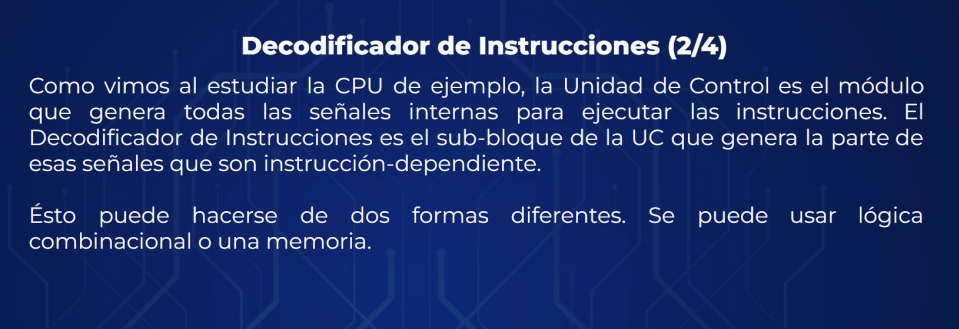

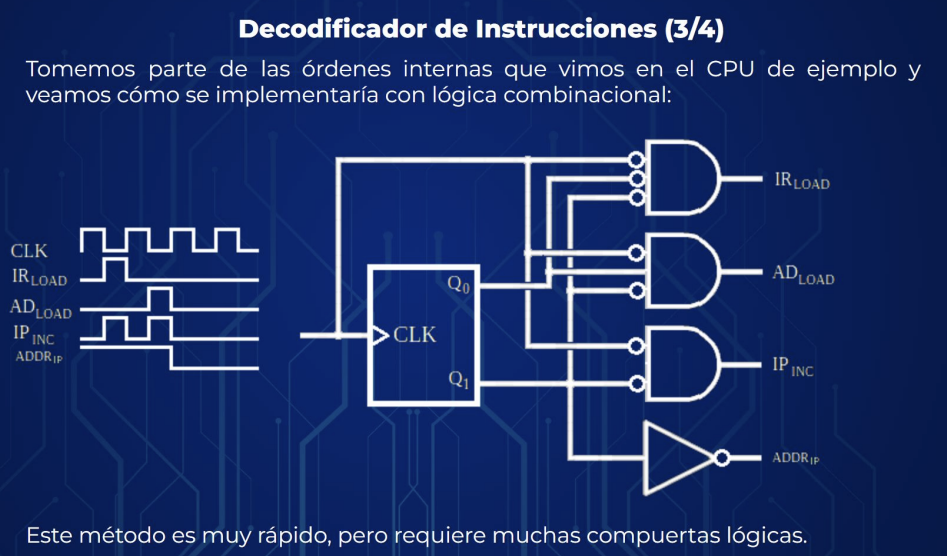

<div style="font-family: 'Source Code Pro'; font-size: 24px;">

La imagen ilustra cómo se implementaría un decodificador de instrucciones utilizando lógica combinacional. Aquí te explico los componentes y el proceso que se muestra:

Componentes y Señales:

1- CLK (Clock):

- La señal de reloj (CLK) es una señal oscilante que sincroniza las operaciones de la CPU. En la imagen se muestran diferentes fases del ciclo de reloj, que activan diferentes partes del circuito en momentos específicos.

2- Q0 y Q1:

- Estos pueden ser registros o flip-flops que almacenan los estados de las señales que se generan a partir del reloj. Se utilizan para coordinar el flujo de las señales en el circuito.

3- Puertas Lógicas:

- La imagen muestra varias puertas AND y puertas OR, que combinan las señales de entrada (Q0, Q1, y otras) para generar las señales de control necesarias.

- También se incluye una puerta NOT para invertir una señal específica.

4- Señales de Control:

- IR LOAD (Instruction Register Load): Esta señal carga la instrucción actual en el registro de instrucciones (IR).

- AD LOAD (Address Load): Carga la dirección en un registro de direcciones.

- IP INC (Instruction Pointer Increment): Incrementa el puntero de instrucciones (IP) para apuntar a la siguiente instrucción.

- ADDR IP (Address Instruction Pointer): Esta señal podría estar indicando que la dirección actual proviene del puntero de instrucciones.

Funcionamiento:

- Sincronización: El circuito utiliza la señal de reloj (CLK) para coordinar cuándo deben activarse las diferentes señales de control.

- Lógica Combinacional: Las puertas lógicas combinan las señales de estado (Q0, Q1) y posiblemente otras señales de entrada para generar las señales de control necesarias (IR LOAD, AD LOAD, etc.) en el momento adecuado.

- Rapidez: Este método es rápido porque la lógica combinacional genera las señales casi instantáneamente, dependiendo solo del retraso inherente a las puertas lógicas.

- Complejidad: Aunque es rápido, este enfoque requiere un número significativo de puertas lógicas, lo que puede aumentar la complejidad del circuito.

Conclusión:

Este esquema muestra cómo un decodificador de instrucciones puede ser implementado utilizando lógica combinacional. Este método es eficaz en términos de velocidad, pero conlleva un alto costo en términos de la cantidad de hardware necesario. Es un ejemplo de cómo la implementación de hardware en CPUs busca equilibrar velocidad y complejidad para optimizar el rendimiento del sistema.

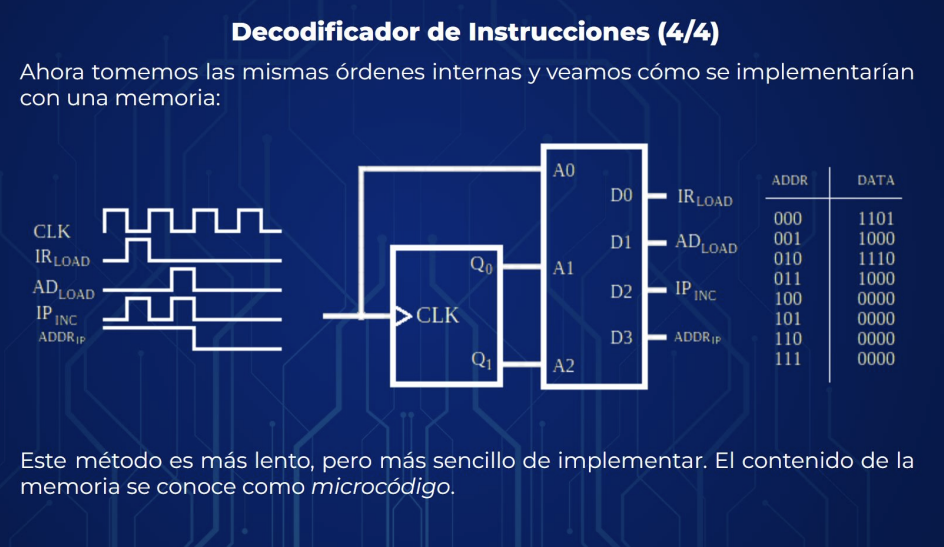

<div style="font-family: 'Source Code Pro'; font-size: 24px;">

La imagen muestra cómo se implementaría un decodificador de instrucciones utilizando una memoria en lugar de lógica combinacional, lo cual es un método más sencillo de implementar, aunque generalmente más lento. Este tipo de implementación se basa en el uso de microcódigo, un conjunto de instrucciones de bajo nivel que controlan los componentes de la CPU.

Componentes y Funcionamiento:

1- CLK (Clock):

- La señal de reloj (CLK) sigue presente, controlando la sincronización de las operaciones, tal como en el método de lógica combinacional.

2- Q0 y Q1:

- Igual que en el método anterior, estos son registros o flip-flops que almacenan estados de señal, utilizados para generar las direcciones de entrada a la memoria.

3- Memoria (Microcódigo):

- La memoria se organiza en direcciones (A0, A1, A2) y datos (D0, D1, D2, D3).

- Las señales de control se almacenan en esta memoria en forma de microinstrucciones.

- Cuando se necesita generar una señal de control, el sistema accede a la dirección correspondiente en la memoria, y los datos almacenados en esa dirección (las microinstrucciones) se usan para controlar el comportamiento de la CPU.

4- Direcciones y Datos:

- A0, A1, A2: Direcciones de la memoria que seleccionan qué microinstrucción se debe ejecutar.

- D0, D1, D2, D3: Datos o señales de control específicas que se generan en función de la dirección ingresada.

- En la tabla mostrada en la imagen:
    
    - Por ejemplo, cuando se accede a la dirección 000, la salida es 1101, lo que activaría las señales IR LOAD, AD LOAD, y IP INC.

    - Diferentes combinaciones de direcciones producen diferentes conjuntos de señales de control.

Comparación con la Lógica Combinacional:

- Velocidad:
    
    - Este método es más lento que el de lógica combinacional porque implica acceder a una memoria para obtener las señales de control.

- Facilidad de Implementación:
    
    - Es más sencillo de implementar, ya que cualquier cambio en la lógica de control se puede manejar cambiando el contenido de la memoria en lugar de rediseñar todo el circuito de puertas lógicas.

- Flexibilidad:
    
    - Permite que la CPU sea más flexible, ya que modificar el microcódigo en la memoria es mucho más fácil que cambiar el hardware.

Conclusión:

El uso de una memoria para implementar un decodificador de instrucciones mediante microcódigo es un enfoque que sacrifica algo de velocidad a cambio de una mayor facilidad de implementación y flexibilidad. Este método es común en diseños de CPU que necesitan ser fácilmente modificables o en sistemas donde la simplicidad y la capacidad de actualización son más importantes que la velocidad máxima.